In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [3]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
import seaborn as sns

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [4]:
#df = pd.read_csv('VIX.csv')
df = pd.read_csv('dataset_Ruled.csv')

In [5]:
df = df.dropna()
#df.iloc[0].column=['Date']
#df = df.drop(['Open_spy','High_spy','Low_spy'],axis=1)

In [6]:
df.head()

,Date,spy_oc,spy_hl,spy_volume,spy_close,vix_close,SPY,short,long
0,20160504 15:30:00,-3.115814,0.124980,-0.344501,-0.003881,-0.016413,205.35,1,0
1,20160504 16:00:00,-1.750486,0.291626,0.538004,-0.001266,0.021632,205.09,1,0
2,20160504 17:00:00,-0.444280,-0.279540,-0.443255,-0.000780,-0.000605,204.93,1,0
3,20160504 18:00:00,0.666223,-0.104462,-0.369692,-0.001269,0.004237,204.67,1,0
4,20160504 19:00:00,-0.959616,-0.233294,0.077159,0.000000,0.004219,204.67,1,0


In [7]:
df.set_index('Date', inplace=True)
df.head()

,spy_oc,spy_hl,spy_volume,spy_close,vix_close,SPY,short,long
Date,,,,,,,,
20160504 15:30:00,-3.115814,0.124980,-0.344501,-0.003881,-0.016413,205.35,1,0
20160504 16:00:00,-1.750486,0.291626,0.538004,-0.001266,0.021632,205.09,1,0
20160504 17:00:00,-0.444280,-0.279540,-0.443255,-0.000780,-0.000605,204.93,1,0
20160504 18:00:00,0.666223,-0.104462,-0.369692,-0.001269,0.004237,204.67,1,0
20160504 19:00:00,-0.959616,-0.233294,0.077159,0.000000,0.004219,204.67,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5256 entries, 20160504  15:30:00 to 20190502  17:00:00
Data columns (total 8 columns):
spy_oc        5256 non-null float64
spy_hl        5256 non-null float64
spy_volume    5256 non-null float64
spy_close     5256 non-null float64
vix_close     5256 non-null float64
SPY           5256 non-null float64
short         5256 non-null int64
long          5256 non-null int64
dtypes: float64(6), int64(2)
memory usage: 369.6+ KB


In [9]:
delta = df.shape[0]
bloc1 = round(delta*0.9)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  5256 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  4730  périodes 
Bloc 2 : 526  périodes


In [10]:
df['long'].sum(),df['short'].sum()

(2602, 2018)

In [11]:
df.head()

,spy_oc,spy_hl,spy_volume,spy_close,vix_close,SPY,short,long
Date,,,,,,,,
20160504 15:30:00,-3.115814,0.124980,-0.344501,-0.003881,-0.016413,205.35,1,0
20160504 16:00:00,-1.750486,0.291626,0.538004,-0.001266,0.021632,205.09,1,0
20160504 17:00:00,-0.444280,-0.279540,-0.443255,-0.000780,-0.000605,204.93,1,0
20160504 18:00:00,0.666223,-0.104462,-0.369692,-0.001269,0.004237,204.67,1,0
20160504 19:00:00,-0.959616,-0.233294,0.077159,0.000000,0.004219,204.67,1,0


In [12]:
Xtrain_long = df.iloc[:bloc1,:5]
#Xtrain_long = Xtrain_long.drop(['short'],axis=1)
Xtest_long = df.iloc[bloc1:,:5]
#Xtest_long = Xtest_long.drop(['short'],axis=1)
ytrain_long = df.iloc[:bloc1,7]
ytest_long = df.iloc[bloc1:,7]

In [13]:
Xtrain_long.head()

,spy_oc,spy_hl,spy_volume,spy_close,vix_close
Date,,,,,
20160504 15:30:00,-3.115814,0.124980,-0.344501,-0.003881,-0.016413
20160504 16:00:00,-1.750486,0.291626,0.538004,-0.001266,0.021632
20160504 17:00:00,-0.444280,-0.279540,-0.443255,-0.000780,-0.000605
20160504 18:00:00,0.666223,-0.104462,-0.369692,-0.001269,0.004237
20160504 19:00:00,-0.959616,-0.233294,0.077159,0.000000,0.004219


In [14]:
ytrain_long.head(),ytrain_long.sum()

(Date
 20160504  15:30:00    0
 20160504  16:00:00    0
 20160504  17:00:00    0
 20160504  18:00:00    0
 20160504  19:00:00    0
 Name: long, dtype: int64, 2289)

In [15]:
Xtrain_short = df.iloc[:bloc1,:5]
#Xtrain_short = Xtrain_short.drop(['Adj Close'],axis=1)
Xtest_short = df.iloc[bloc1:,:5]
#Xtest_short = Xtest_short.drop(['Adj Close'],axis=1)
ytrain_short = df.iloc[:bloc1,6]
ytest_short = df.iloc[bloc1:,6]
print('Split effectué')

Split effectué


In [16]:
ytrain_long.shape,Xtrain_long.shape,Xtest_long.shape,ytest_long.shape

((4730,), (4730, 5), (526, 5), (526,))

In [17]:
ytrain_short.shape,Xtrain_short.shape,Xtest_short.shape,ytest_short.shape

((4730,), (4730, 5), (526, 5), (526,))

In [18]:
model_long = XGBClassifier(
    max_depth=8,
    learning_rate=0.01,
    n_estimators=300,
    silent=False,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=2,
    min_child_weight=2,
    max_delta_step=1,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=1,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None
)

In [19]:
model_short = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [20]:
eval_set_long=[(Xtrain_long, ytrain_long), (Xtest_long, ytest_long)]

In [21]:
eval_set_short=[(Xtrain_short, ytrain_short), (Xtest_short, ytest_short)]

In [22]:
model_long.fit( Xtrain_long, ytrain_long, eval_metric=['auc','error','logloss'], eval_set=eval_set_long, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=2, learning_rate=0.01, max_delta_step=1,
       max_depth=8, min_child_weight=2, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [23]:
model_short.fit( Xtrain_short, ytrain_short, eval_metric=['auc','error','logloss'], eval_set=eval_set_short, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [24]:
predictions_long = model_long.predict(Xtest_long)
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('RESULTATS LONG\n')
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_long * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = model_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_long, predictions_long))
print('Matrice de confusion :')
conf_matrix

RESULTATS LONG

Accuracy: 75.29%
Precision: 92.17%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 63.90%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 77.96% 
AUC_proba: 83.88% 
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       213
           1       0.92      0.64      0.75       313

   micro avg       0.75      0.75      0.75       526
   macro avg       0.78      0.78      0.75       526
weighted avg       0.81      0.75      0.75       526

[[196  17]
 [113 200]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [25]:
predictions_short = model_short.predict(Xtest_short)
accuracy_short = accuracy_score(ytest_short, predictions_short)
precision_short=precision_score(ytest_short, predictions_short) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_short = recall_score(ytest_short, predictions_short) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_short=roc_auc_score(ytest_short,predictions_short)
print('RESULTATS SHORT\n')
print('Accuracy: %.2f%%' % (accuracy_short * 100.0))
print("Precision: %.2f%% " % (precision_short *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_short * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_short *100))
# get probabilities for positive class
prediction_short = model_short.predict_proba(Xtest_short)
roc_short2 = roc_auc_score(ytest_short, prediction_short[:,1])
print("AUC_proba: %.2f%% " % (roc_short2 * 100))
print(classification_report(ytest_short, predictions_short))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_short, predictions_short))
print('Matrice de confusion :')
conf_matrix

RESULTATS SHORT

Accuracy: 78.90%
Precision: 69.77%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 67.04%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 76.03% 
AUC_proba: 85.23% 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       347
           1       0.70      0.67      0.68       179

   micro avg       0.79      0.79      0.79       526
   macro avg       0.77      0.76      0.76       526
weighted avg       0.79      0.79      0.79       526

[[295  52]
 [ 59 120]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [26]:
type(predictions_long),len(predictions_long), predictions_long.sum()

(numpy.ndarray, 526, 217)

In [27]:
type(predictions_short),len(predictions_short), predictions_short.sum()

(numpy.ndarray, 526, 172)

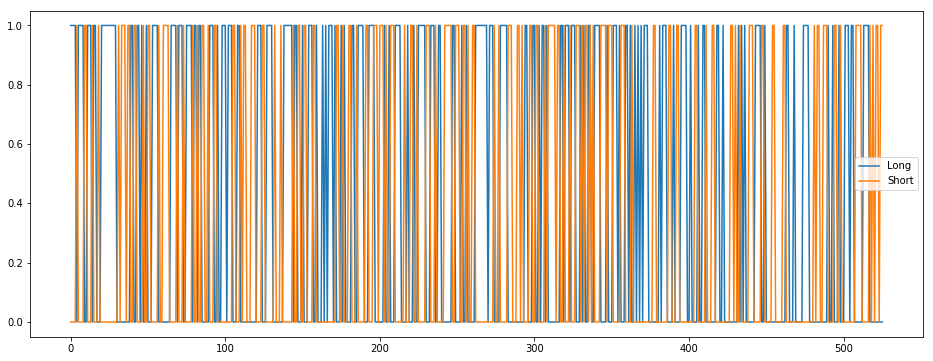

In [28]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,label = 'Long')
plt.plot(predictions_short,label = 'Short')
plt.legend()

In [37]:
backtest = pd.DataFrame()
backtest['Close_SPY'] = df.iloc[-526:,5]
backtest['long'] = predictions_long
backtest['short'] = predictions_short
backtest.head()

,Close_SPY,long,short
Date,,,
20190114 17:00:00,257.59,1,0
20190114 18:00:00,257.85,1,0
20190114 19:00:00,257.97,1,0
20190114 20:00:00,258.14,1,0
20190114 21:00:00,257.46,0,1


In [38]:
#backtest = backtest.iloc[bloc1:,:]
backtest.head()

,Close_SPY,long,short
Date,,,
20190114 17:00:00,257.59,1,0
20190114 18:00:00,257.85,1,0
20190114 19:00:00,257.97,1,0
20190114 20:00:00,258.14,1,0
20190114 21:00:00,257.46,0,1


In [31]:
backtest['long'].sum(),backtest['short'].sum()

(217, 172)

In [32]:
len(predictions_short),predictions_short.sum(),len(prediction_short),prediction_short.sum(),len(predictions_long),predictions_long.sum(),len(prediction_long),prediction_long.sum()

(526, 172, 526, 526.0, 526, 217, 526, 526.0)

In [33]:
backtest.shape

(526, 3)

In [34]:
#backtest = backtest.iloc[4800:,:]

In [35]:
backtest.head()

,Close_SPY,long,short
Date,,,


In [39]:
long_pos = 0
short_pos = 0
equity = 200000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = 0.002
stop_loss_long = -0.002
ticket = 100000
target_long = 0.006
target_short = -0.006
longueur = (backtest.shape[0])-1
long_exit = []
short_exit = []
long_sl = []
short_sl = []
go_long = []
go_short = []
lea = 0
sea = 0
gain_sum = 0
loss_sum = 0

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_5.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 1 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        n = (ticket/price_buy_long)
        equity = equity - n/200
        equity_list.append(equity)
        col_profit.append(0)
        go_long.append(1)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long,'et ',n,' actions')
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long)/price_buy_long > target_long:
            print('\n sortie de position long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print("variation sur prix d'achat ", (backtest.iloc[i,0] - price_buy_long)/price_buy_long)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_long)*n)
            equity = equity - n/200 + ((backtest.iloc[i,0] - price_buy_long) * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_exit.append(1)
            col_profit.append(( backtest.iloc[i,0] - price_buy_long) * n)
            if ((backtest.iloc[i-5,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i-5,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            gain_sum = gain_sum + (backtest.iloc[i,0] - price_buy_long)*n
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long)/price_buy_long < stop_loss_long:
            equity = equity - n/200 + ((backtest.iloc[i,0] - price_buy_long) * n)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * n))
            if ((backtest.iloc[i,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i-5,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i-5,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            long_pos = 0
            loss_sum = loss_sum + abs(( backtest.iloc[i,0] - price_buy_long)*n)
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        n = ticket/price_buy_short
        equity = equity - n/200
        equity_list.append(equity)
        col_profit.append(0)
        go_short.append(1)
        print('\n Go Short le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short)/price_buy_short < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_short)*n)
            equity = equity - n/200 + abs((backtest.iloc[i,0] - price_buy_short) * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_exit.append(1)
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * n)))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
            gain_sum = gain_sum + abs((backtest.iloc[i,0] - price_buy_short) * n)
        
        elif (backtest.iloc[i,0] - price_buy_short) > stop_loss_short:
            equity = equity - n/200 - abs((backtest.iloc[i,0] - price_buy_short)* n)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',-(backtest.iloc[i,0] - price_buy_short)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_short) * n))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
            loss_sum = loss_sum + abs((backtest.iloc[i,0] - price_buy_short) * n)
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    


if long_pos == 1 :
    print("Sortie d'une position long en l'air")
    equity = equity - n/200 + ((backtest.iloc[longueur,0]- price_buy_long) * n)
    lea = 1
if short_pos == 1 :
    print("Sortie d'une position short en l'air")
    equity = equity - n/200 + ((backtest.iloc[longueur,0]- price_buy_short) * n)
    sea = 1
    
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )


Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ 7759.58501721159 !. En  241  transactions.


In [40]:
longueur_long = (backtest.shape[0])-1

In [41]:
backtest.iloc[longueur,2]

1

In [42]:
len(equity_list),backtest['long'].sum(),nb_transaction,equity-100000,backtest['short'].sum()

(843, 217, 241, 107759.58501721159, 172)

gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [43]:
len(equity_list),len(col_profit),26452-26437

(843, 843, 15)

In [44]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

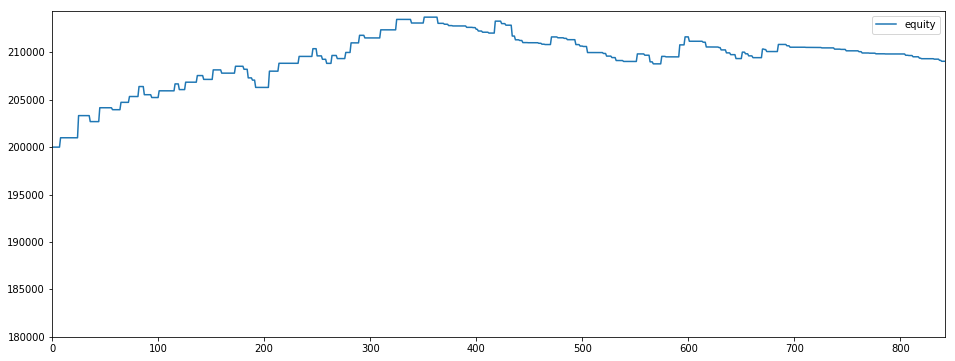

In [45]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=(180000))
plt.legend()

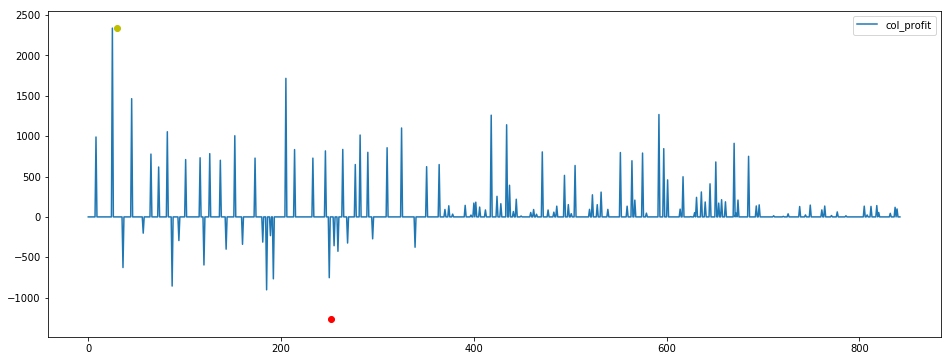

In [46]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [47]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [48]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Equity initiale : $200,000')
print('Equity finale : ',round(equity,2))
print('Gain généré :',round(equity-200000,2),'$')
print('Nombre de transactions : ',nb_transaction)
print('Nombre de Long : ',sum(go_long))
print('Nombre de Short : ',sum(go_short))
print('Nombre winners : ',sum(long_exit) + sum(short_exit))
print('Nombre loosers : ',sum(long_sl) + sum(short_sl))
print('Nombre de long winners : ',sum(long_exit))
print('Nombre de short winners : ',sum(short_exit))
print('Nombre de long loosers : ',sum(long_sl))
print('Nombre de short loosers : ',sum(short_sl))
print("Nombre de short en l'air : ", sea)
print("Nombre long en l'air : ",lea)
print('Fees : ',nb_transaction*1.5)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',round(((equity-200000)/(nb_transaction/2)),2))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Période testée :
Début :  20190114  17:00:00
Fin :  20190502  17:00:00
ROC long :  77.96 %
ROC short :  76.03 %
Transaction à $100,000
Equity initiale : $200,000
Equity finale :  207759.59
Gain généré : 7759.59 $
Nombre de transactions :  241
Nombre de Long :  40
Nombre de Short :  81
Nombre winners :  32
Nombre loosers :  88
Nombre de long winners :  23
Nombre de short winners :  9
Nombre de long loosers :  17
Nombre de short loosers :  71
Nombre de short en l'air :  1
Nombre long en l'air :  0
Fees :  361.5
Gain maximal 2338.89   2338.89
Perte maximale -903.53   -1268.59
Moyenne du gain 64.39
Somme de tous les gains 29994.91
Somme de tous le loss 20512.03
profit factor 1.46


In [49]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_long, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_short, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)